In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# The path to our CSV file
file = "Resources/original_olympic_data.csv"

# Read our data into pandas
df = pd.read_csv(file)
df.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
#Found Column name
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [5]:
starter_olympics_df = df.loc[:, ['Name', 'Sex', 'Age', 'Team',
                                'Year', 'Sport', 'Event', 'Medal']]
starter_olympics_df.head()


,Name,Sex,Age,Team,Year,Sport,Event,Medal
0,A Dijiang,M,24.0,China,1992,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,China,2012,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,Denmark,1920,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,Denmark/Sweden,1900,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,Netherlands,1988,Speed Skating,Speed Skating Women's 500 metres,NaN


In [6]:
medals_df = df.loc[:, ['Team','Name', 'Sex', 'Year', 'Event', 'Medal']]

In [7]:
medals_winners_df= medals_df.dropna(how='any')

In [8]:
medals_winners_df.head()

,Team,Name,Sex,Year,Event,Medal
3,Denmark/Sweden,Edgar Lindenau Aabye,M,1900,Tug-Of-War Men's Tug-Of-War,Gold
37,Finland,Arvo Ossian Aaltonen,M,1920,Swimming Men's 200 metres Breaststroke,Bronze
38,Finland,Arvo Ossian Aaltonen,M,1920,Swimming Men's 400 metres Breaststroke,Bronze
40,Finland,Juhamatti Tapio Aaltonen,M,2014,Ice Hockey Men's Ice Hockey,Bronze
41,Finland,Paavo Johannes Aaltonen,M,1948,Gymnastics Men's Individual All-Around,Bronze


In [45]:
medals_winners_df

,Team,Name,Sex,Year,Event,Medal
3,Denmark/Sweden,Edgar Lindenau Aabye,M,1900,Tug-Of-War Men's Tug-Of-War,Gold
37,Finland,Arvo Ossian Aaltonen,M,1920,Swimming Men's 200 metres Breaststroke,Bronze
38,Finland,Arvo Ossian Aaltonen,M,1920,Swimming Men's 400 metres Breaststroke,Bronze
40,Finland,Juhamatti Tapio Aaltonen,M,2014,Ice Hockey Men's Ice Hockey,Bronze
41,Finland,Paavo Johannes Aaltonen,M,1948,Gymnastics Men's Individual All-Around,Bronze
...,...,...,...,...,...,...
271078,Soviet Union,Galina Ivanovna Zybina (-Fyodorova),F,1956,Athletics Women's Shot Put,Silver
271080,Soviet Union,Galina Ivanovna Zybina (-Fyodorova),F,1964,Athletics Women's Shot Put,Bronze
271082,Poland,Bogusaw Zych,M,1980,"Fencing Men's Foil, Team",Bronze
271102,Russia,Olesya Nikolayevna Zykina,F,2000,Athletics Women's 4 x 400 metres Relay,Bronze


In [142]:
medal_winners = medals_winners_df[(medals_winners_df["Team"] == "United States")]

,Team,Name,Sex,Year,Event,Medal
186,United States,Stephen Anthony Abas,M,2004,"Wrestling Men's Featherweight, Freestyle",Silver
278,United States,Jeremy Abbott,M,2014,Figure Skating Mixed Team,Bronze
283,United States,Margaret Ives Abbott (-Dunne),F,1900,Golf Women's Individual,Gold
286,United States,Monica Cecilia Abbott,F,2008,Softball Women's Softball,Silver
311,United States,Nia Nicole Abdallah,F,2004,Taekwondo Women's Featherweight,Silver
...,...,...,...,...,...,...
269922,United States,Rbert Zimonyi,M,1964,Rowing Men's Coxed Eights,Gold
270058,United States,"Albert Conrad ""Al"" Zirkel",M,1904,"Wrestling Men's Lightweight, Freestyle",Bronze
270182,United States,"Kimberley Lyn ""Kim"" Zmeskal (-Burdette)",F,1992,Gymnastics Women's Team All-Around,Bronze
270220,United States,"Jacqueline Jean ""Jackie"" Zoch",F,1976,Rowing Women's Coxed Eights,Bronze


In [148]:
Male_Winner = medal_winners.loc[medal_winners["Sex"] == "M",:]
Female_Winner = medal_winners.loc[medal_winners["Sex"] == "F",:]

In [149]:
#Male_Winner
Female_Winner

,Team,Name,Sex,Year,Event,Medal
283,United States,Margaret Ives Abbott (-Dunne),F,1900,Golf Women's Individual,Gold
286,United States,Monica Cecilia Abbott,F,2008,Softball Women's Softball,Silver
311,United States,Nia Nicole Abdallah,F,2004,Taekwondo Women's Featherweight,Silver
1514,United States,Rachael Alexis Adams,F,2016,Volleyball Women's Volleyball,Bronze
2352,United States,Robyn Mokihana Ah Mow-Santos,F,2008,Volleyball Women's Volleyball,Silver
...,...,...,...,...,...,...
269641,United States,"Nicole ""Nikki"" Ziegelmeyer (-Brown, -Meyer)",F,1992,"Short Track Speed Skating Women's 3,000 metres...",Silver
269642,United States,"Nicole ""Nikki"" Ziegelmeyer (-Brown, -Meyer)",F,1994,"Short Track Speed Skating Women's 3,000 metres...",Bronze
269854,United States,Suzanne Winona Zimmerman (-Edwards),F,1948,Swimming Women's 100 metres Backstroke,Silver
270182,United States,"Kimberley Lyn ""Kim"" Zmeskal (-Burdette)",F,1992,Gymnastics Women's Team All-Around,Bronze


In [194]:
#medal_winners = medals_winners_df[(medals_winners_df["Team"] == "United States")]
Female_Gold = Female_Winner[Female_Winner["Medal"] == "Gold"]
Female_Gold.reset_index()
Female_year = Female_Gold.groupby(["Year"])
Fcount = Female_year['Medal'].count()
USAF = pd.DataFrame(data=Fcount)
Women = USAF.reset_index()
Women

,Year,Medal
0,1900,1
1,1904,2
2,1920,7
3,1924,10
4,1928,11
5,1932,17
6,1936,7
7,1948,9
8,1952,8
9,1956,5


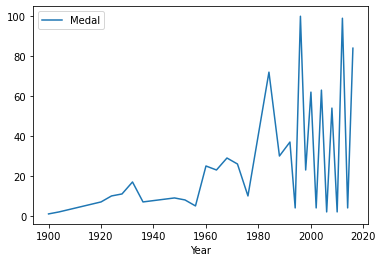

In [199]:
USAF.plot(label="Gold Medal")
plt.legend()
plt.show()

In [181]:
plt.plot(USAF["Medal"], USAF["Year"], color = "pink", label = "Women medal count over years")

KeyError: 'Year'

In [111]:
Count = Female_selection.groupby('Medal')
Medal_Count = Count['Medal'].count()
Medal_Count

Medal
Bronze    405
Gold      830
Silver    521
Name: Medal, dtype: int64

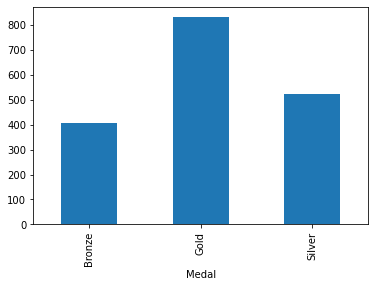

In [112]:
Medal_Chart = Medal_Count.plot(kind='bar')